# EDU RANK PREDICTION on THE

## Introduction

This notebook is a part of the project for the department of Data Management at Dokuz Eylul University. 




In [559]:
# how can ı const the path

In [560]:
from sympy.integrals.meijerint_doc import category
from xgboost.dask import predict

DATA_PATH = "../data/"
SRC_PATH = "../src/"



In [561]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [562]:
# Load the data
data = pd.read_excel(DATA_PATH + "THE.xlsx")

In [563]:
data = data.iloc[:2092] # drop the rank column has NaN values

In [564]:
data.shape # 2092 rows and 29 columns


(2092, 29)

In [565]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         2092 non-null   int64  
 1   rank                               2092 non-null   object 
 2   name                               2092 non-null   object 
 3   scores_overall                     2092 non-null   object 
 4   scores_overall_rank                2092 non-null   int64  
 5   scores_teaching                    2092 non-null   float64
 6   scores_teaching_rank               2092 non-null   int64  
 7   scores_research                    2092 non-null   float64
 8   scores_research_rank               2092 non-null   int64  
 9   scores_citations                   2092 non-null   float64
 10  scores_citations_rank              2092 non-null   int64  
 11  scores_industry_income             2092 non-null   float

In [566]:
data.isnull().sum()

rank_order                            0
rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_teaching                       0
scores_teaching_rank                  0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
record_type                           0
member_level                          0
url                                   0
nid                                   0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio              81
aliases                               0


In [567]:
#data.loc[data['closed'] == 1] No closed universities
data.drop('closed', axis=1, inplace=True)

In [568]:
data['rank'].value_counts() 

rank
1501+        591
1201–1500    302
601–800      203
1001–1200    200
801–1000     195
            ... 
44             1
43             1
42             1
41             1
89             1
Name: count, Length: 142, dtype: int64

In [569]:
data['rank'] = data['rank'].astype(str)
data['stats_number_students'] = data['stats_number_students'].str.replace(',', '').astype(float)


In [570]:
# Verilerin tipini ve boş değerlerini kontrol edelim
data['rank_order'] = pd.to_numeric(data['rank_order'], errors='coerce')  # String değerleri NaN yapar

# Rank değerlerini kategorilere ayırma
def categorize_rank(rank):
    if pd.isna(rank):  # Eğer rank değeri NaN ise
        return None  # İsteğe göre 'Unknown' da döndürülebilir
    elif rank <= 6000:
        return '0-600'
    elif rank <= 11000:
        return '601-1100'
    elif rank <= 13000:
        return '1101-1300'
    elif rank <= 14000:
        return '1301-1400'
    elif rank <= 15000:
        return '1401-1500'
    elif rank <= 16000:
        return '1501-1600'
    elif rank <= 17000:
        return '1601-1700'
    elif rank > 17000:
        return '1700+'

# Kategorileri ata
data['label'] = data['rank_order'].apply(categorize_rank)


In [571]:
data['label'].value_counts()

label
0-600        600
601-1100     500
1700+        392
1101-1300    200
1301-1400    100
1401-1500    100
1501-1600    100
1601-1700    100
Name: count, dtype: int64

In [572]:
target = data['label']

In [573]:
data.drop(['rank'], axis=1, inplace=True)


In [574]:
data

,rank_order,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,unaccredited,disabled,label
0,10,University of Oxford,98.5,10,96.8,5,100.0,1,98.8,8,...,United Kingdom,22095.0,10.8,43%,51 : 49,University of Oxford,"Computer Science,Languages, Literature & Linguistics,Mathematics & Statistics,Economics & Econometrics,Law,Accounting & Finance,Chemical Engineering,Archaeology,Communication & Media Studies,Civil Engineering,Education,Mechanical & Aerospace Engineering,Geology, Environmental, Earth & Marine Sciences,Psychology,Biological Sciences,Geography,Politics & International Studies (incl Development Studies),Other Health,General Engineering,Business & Management,Chemistry,Medicine & Dentistry,Art, Performing Arts & Design,Electrical & Electronic Engineering,Physics & Astronomy,History, Philosophy & Theology,Sociology",False,False,0-600
1,20,Massachusetts Institute of Technology,98.1,20,99.2,1,96.0,11,99.7,1,...,United States,11836.0,8.0,33%,42 : 58,Massachusetts Institute of Technology,"Biological Sciences,Electrical & Electronic Engineering,Languages, Literature & Linguistics,Economics & Econometrics,Psychology,Art, Performing Arts & Design,Physics & Astronomy,Mechanical & Aerospace Engineering,Sociology,Communication & Media Studies,Mathematics & Statistics,Architecture,General Engineering,Civil Engineering,Chemical Engineering,History, Philosophy & Theology,Geology, Environmental, Earth & Marine Sciences,Archaeology,Other Health,Chemistry,Politics & International Studies (incl Development Studies),Computer Science,Business & Management",False,False,0-600
2,30,Harvard University,97.7,30,97.3,4,99.9,2,99.3,3,...,United States,22584.0,10.0,25%,52 : 48,Harvard University,"Archaeology,Mathematics & Statistics,Art, Performing Arts & Design,Psychology,Other Health,Chemistry,Economics & Econometrics,Biological Sciences,Accounting & Finance,Physics & Astronomy,Medicine & Dentistry,Communication & Media Studies,Civil Engineering,Mechanical & Aerospace Engineering,Law,History, Philosophy & Theology,Geography,Education,Computer Science,General Engineering,Politics & International Studies (incl Development Studies),Languages, Literature & Linguistics,Business & Management,Architecture,Sociology,Geology, Environmental, Earth & Marine Sciences,Electrical & Electronic Engineering,Agriculture & Forestry",False,False,0-600
3,40,Princeton University,97.5,40,98.3,2,98.0,6,98.9,7,...,United States,8378.0,7.8,23%,47 : 53,Princeton University,"Chemistry,Languages, Literature & Linguistics,Mechanical & Aerospace Engineering,Sociology,Chemical Engineering,Economics & Econometrics,General Engineering,Geology, Environmental, Earth & Marine Sciences,Computer Science,Mathematics & Statistics,Other Health,Biological Sciences,History, Philosophy & Theology,Agriculture & Forestry,Electrical & Electronic Engineering,Politics & International Studies (incl Development Studies),Art, Performing Arts & Design,Physics & Astronomy,Architecture,Civil Engineering,Psychology",False,False,0-600
4,50,University of Cambridge,97.4,50,95.9,6,99.9,3,97.6,17,...,United Kingdom,20980.0,11.5,38%,49 : 51,University of Cambridge,"History, Philosophy & Theology,Biological Sciences,Geology, Environmental, Earth & Marine Sciences,Law,Electrical & Electronic Engineering,Architecture,Psychology,Veterinary Science,Politics & International Studies (incl Development Studies),Physics & Astronomy,General Engineering,Archaeology,Medicine & Dentistry,Chemistry,Mechanical & Aerospace Engineering,Geography,Economics & Econometrics,Languages, Literature & Linguistics,Computer Science,Mathematics & Statistics,Civil Engineering,Sociology,Business & Management,Chemical Engineering,Art, Performing Arts & Design,Education",False,False,0-600
...,...,...,...,...,...,.

In [575]:
data.drop(columns=['name','url','aliases','unaccredited'], inplace=True)

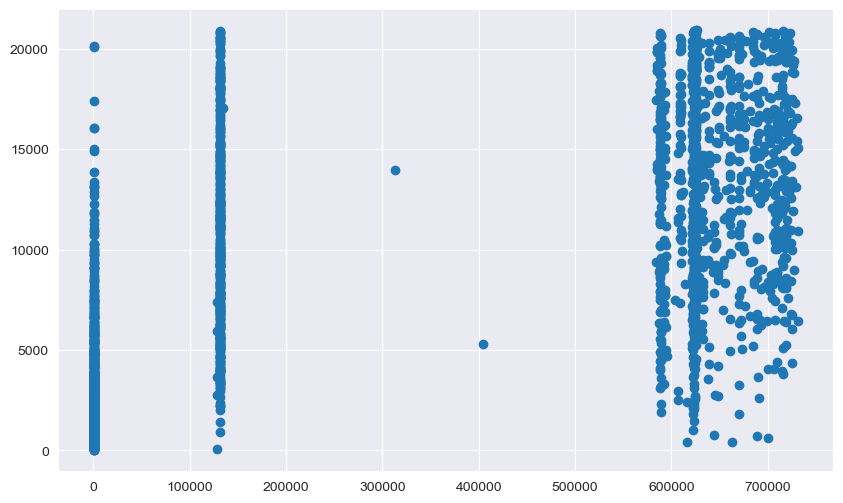

In [576]:
plt.figure(figsize=(10, 6))
plt.scatter(data['nid'],data['rank_order'])

In [577]:
data['scores_overall'] = data['scores_overall'].str.split('–').str[0].astype(float)



In [578]:
data[['rank_order','member_level']].corr()

,rank_order,member_level
rank_order,1.000000,-0.231823
member_level,-0.231823,1.000000


In [579]:
data['location'].value_counts() 

location
United States     174
Japan             119
United Kingdom    107
India             107
China              94
                 ... 
Luxembourg          1
Palestine           1
Bahrain             1
Oman                1
Armenia             1
Name: count, Length: 115, dtype: int64

In [580]:
# location if country count less than 10, convert to 'Other'
country_count = data['location'].value_counts()
data['location'] = data['location'].apply(lambda x: 'Other' if country_count[x] < 6 else x)



In [581]:
data.loc[data['location'] == 'Other']

,rank_order,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,...,member_level,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,disabled,label
16,170,89.9,170,78.4,24,93.6,15,95.7,41,100.0,...,6,504,Other,34388.0,21.0,26%,49 : 51,"Computer Science,Chemistry,Economics & Econometrics,General Engineering,Geology, Environmental, Earth & Marine Sciences,Architecture,Chemical Engineering,Geography,Medicine & Dentistry,Mathematics & Statistics,Psychology,Electrical & Electronic Engineering,Communication & Media Studies,Art, Performing Arts & Design,Mechanical & Aerospace Engineering,Politics & International Studies (incl Development Studies),History, Philosophy & Theology,Biological Sciences,Law,Other Health,Physics & Astronomy,Accounting & Finance,Languages, Literature & Linguistics,Civil Engineering,Sociology,Archaeology,Agriculture & Forestry,Business & Management",False,0-600
29,300,81.8,300,65.8,51,79.3,30,94.5,54,99.9,...,6,634,Other,26044.0,17.1,29%,48 : 52,"Psychology,Geology, Environmental, Earth & Marine Sciences,Chemical Engineering,Politics & International Studies (incl Development Studies),Computer Science,Biological Sciences,General Engineering,History, Philosophy & Theology,Communication & Media Studies,Electrical & Electronic Engineering,Accounting & Finance,Mathematics & Statistics,Sport Science,Medicine & Dentistry,Chemistry,Sociology,Civil Engineering,Art, Performing Arts & Design,Economics & Econometrics,Business & Management,Languages, Literature & Linguistics,Mechanical & Aerospace Engineering,Other Health,Physics & Astronomy,Education",False,0-600
180,1810,59.7,1810,37.7,377,39.0,274,90.7,104,70.4,...,11,1027,Other,11573.0,19.2,46%,54 : 46,"General Engineering,Communication & Media Studies,Civil Engineering,Politics & International Studies (incl Development Studies),Medicine & Dentistry,Biological Sciences,Education,Computer Science,Economics & Econometrics,Sport Science,Law,Electrical & Electronic Engineering,Sociology,History, Philosophy & Theology,Physics & Astronomy,Accounting & Finance,Art, Performing Arts & Design,Chemistry,Psychology,Languages, Literature & Linguistics,Mathematics & Statistics,Business & Management,Other Health,Geology, Environmental, Earth & Marine Sciences,Mechanical & Aerospace Engineering",False,0-600
219,2200,55.8,2200,31.0,693,37.4,302,87.5,171,69.0,...,0,131534,Other,9701.0,8.5,36%,NaN,"Law,Languages, Literature & Linguistics,Civil Engineering,Sociology,Politics & International Studies (incl Development Studies),Business & Management,Art, Performing Arts & Design,Geology, Environmental, Earth & Marine Sciences,Computer Science,Accounting & Finance,Chemical Engineering,Biological Sciences,Economics & Econometrics,History, Philosophy & Theology,Sport Science,Mechanical & Aerospace Engineering,Psychology,Medicine & Dentistry,Communication & Media Studies,Education,Mathematics & Statistics,Chemistry,Other Health,Physics & Astronomy,Architecture,General Engineering,Electrical & Electronic Engineering,Geography",False,0-600
237,2380,55.8,2380,39.2,333,39.5,261,77.1,401,81.3,...,0,131698,Other,5860.0,22.1,52%,54 : 46,"Computer Science,Physics & Astronomy,Economics & Econometrics,Medicine & Dentistry,Architecture,Law,Art, Performing Arts & Design,Civil Engineering,Accounting & Finance,Languages, Literature & Linguistics,Communication & Media Studies,Electrical & Electronic Engineering,Education,Veterinary Science,Business & Management,Other Health,Geography,Biological Sciences,Politics & International Studies (incl Development Studies),History, Philosophy & Theology,Mathematics & Statistics,General Engineering,Psychology,Mechanical & Aerospace Engineering",False,0-600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,20410,10.5,20410,20.2,1481,11.2,1627

In [582]:
data['location'].value_counts(  )

location
United States     174
Japan             119
United Kingdom    107
India             107
Other             102
                 ... 
Norway              6
Philippines         6
Peru                6
Sri Lanka           6
Slovakia            6
Name: count, Length: 62, dtype: int64

In [583]:
# 2. Target Encoding
from sklearn.preprocessing import LabelEncoder



In [584]:
data

,rank_order,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,...,member_level,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,disabled,label
0,10,98.5,10,96.8,5,100.0,1,98.8,8,99.6,...,0,468,United Kingdom,22095.0,10.8,43%,51 : 49,"Computer Science,Languages, Literature & Linguistics,Mathematics & Statistics,Economics & Econometrics,Law,Accounting & Finance,Chemical Engineering,Archaeology,Communication & Media Studies,Civil Engineering,Education,Mechanical & Aerospace Engineering,Geology, Environmental, Earth & Marine Sciences,Psychology,Biological Sciences,Geography,Politics & International Studies (incl Development Studies),Other Health,General Engineering,Business & Management,Chemistry,Medicine & Dentistry,Art, Performing Arts & Design,Electrical & Electronic Engineering,Physics & Astronomy,History, Philosophy & Theology,Sociology",False,0-600
1,20,98.1,20,99.2,1,96.0,11,99.7,1,100.0,...,0,471,United States,11836.0,8.0,33%,42 : 58,"Biological Sciences,Electrical & Electronic Engineering,Languages, Literature & Linguistics,Economics & Econometrics,Psychology,Art, Performing Arts & Design,Physics & Astronomy,Mechanical & Aerospace Engineering,Sociology,Communication & Media Studies,Mathematics & Statistics,Architecture,General Engineering,Civil Engineering,Chemical Engineering,History, Philosophy & Theology,Geology, Environmental, Earth & Marine Sciences,Archaeology,Other Health,Chemistry,Politics & International Studies (incl Development Studies),Computer Science,Business & Management",False,0-600
2,30,97.7,30,97.3,4,99.9,2,99.3,3,85.7,...,0,466,United States,22584.0,10.0,25%,52 : 48,"Archaeology,Mathematics & Statistics,Art, Performing Arts & Design,Psychology,Other Health,Chemistry,Economics & Econometrics,Biological Sciences,Accounting & Finance,Physics & Astronomy,Medicine & Dentistry,Communication & Media Studies,Civil Engineering,Mechanical & Aerospace Engineering,Law,History, Philosophy & Theology,Geography,Education,Computer Science,General Engineering,Politics & International Studies (incl Development Studies),Languages, Literature & Linguistics,Business & Management,Architecture,Sociology,Geology, Environmental, Earth & Marine Sciences,Electrical & Electronic Engineering,Agriculture & Forestry",False,0-600
3,40,97.5,40,98.3,2,98.0,6,98.9,7,96.9,...,0,469,United States,8378.0,7.8,23%,47 : 53,"Chemistry,Languages, Literature & Linguistics,Mechanical & Aerospace Engineering,Sociology,Chemical Engineering,Economics & Econometrics,General Engineering,Geology, Environmental, Earth & Marine Sciences,Computer Science,Mathematics & Statistics,Other Health,Biological Sciences,History, Philosophy & Theology,Agriculture & Forestry,Electrical & Electronic Engineering,Politics & International Studies (incl Development Studies),Art, Performing Arts & Design,Physics & Astronomy,Architecture,Civil Engineering,Psychology",False,0-600
4,50,97.4,50,95.9,6,99.9,3,97.6,17,88.4,...,0,470,United Kingdom,20980.0,11.5,38%,49 : 51,"History, Philosophy & Theology,Biological Sciences,Geology, Environmental, Earth & Marine Sciences,Law,Electrical & Electronic Engineering,Architecture,Psychology,Veterinary Science,Politics & International Studies (incl Development Studies),Physics & Astronomy,General Engineering,Archaeology,Medicine & Dentistry,Chemistry,Mechanical & Aerospace Engineering,Geography,Economics & Econometrics,Languages, Literature & Linguistics,Computer Science,Mathematics & Statistics,Civil Engineering,Sociology,Business & Management,Chemical Engineering,Art, Performing Arts & Design,Education",False,0-600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,20880,10.5,20880,20.2,1483,12.0,1520,39.7,1353,49.1,...,0,623463,China,39528.0,13.0,1%,37 : 63,"Art, Performing Arts & Design,Languages, L

In [585]:
le = LabelEncoder()
data['location'] = le.fit_transform(data['location'])

# One-hot encoding
one_hot_record_type = pd.get_dummies(data['record_type'], drop_first=True)
one_hot_disabled = pd.get_dummies(data['disabled'], drop_first=True)

# Concatenate the one-hot encoded columns with the original DataFrame
data = pd.concat([data, one_hot_record_type, one_hot_disabled], axis=1)
data.drop(['record_type', 'disabled'], axis=1, inplace=True)

In [586]:

data['subjects_offered lenth'] = data['subjects_offered'].str.split(',').str.len()
data.drop('subjects_offered', axis=1, inplace=True)

In [587]:
data

,rank_order,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,label,private,public,True,subjects_offered lenth
0,10,98.5,10,96.8,5,100.0,1,98.8,8,99.6,...,59,22095.0,10.8,43%,51 : 49,0-600,False,False,False,32
1,20,98.1,20,99.2,1,96.0,11,99.7,1,100.0,...,60,11836.0,8.0,33%,42 : 58,0-600,True,False,False,28
2,30,97.7,30,97.3,4,99.9,2,99.3,3,85.7,...,60,22584.0,10.0,25%,52 : 48,0-600,True,False,False,33
3,40,97.5,40,98.3,2,98.0,6,98.9,7,96.9,...,60,8378.0,7.8,23%,47 : 53,0-600,True,False,False,26
4,50,97.4,50,95.9,6,99.9,3,97.6,17,88.4,...,59,20980.0,11.5,38%,49 : 51,0-600,False,False,False,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,20880,10.5,20880,20.2,1483,12.0,1520,39.7,1353,49.1,...,9,39528.0,13.0,1%,37 : 63,1700+,False,False,False,26
2088,20890,10.5,20890,20.5,1454,12.1,1506,22.1,1795,49.6,...,56,17506.0,29.9,6%,56 : 44,1700+,False,False,False,28
2089,20900,10.5,20900,24.8,1098,8.8,1993,8.7,2052,20.9,...,37,13923.0,8.0,3%,53 : 47,1700+,False,False,False,3
2090,20910,10.5,20910,18.0,1705,9.8,1841,8.8,2050,17.2,...,57,12377.0,12.5,1%,49 : 51,1700+,False,False,False,27


In [588]:
data['stats_pc_intl_students'] = data['stats_pc_intl_students'].str.replace('%', '').astype(float) / 100
data['stats_female_ratio'] = data['stats_female_male_ratio'].str.split(':').str[0].astype(float) / 100
data.drop('stats_female_male_ratio' , axis=1, inplace=True)

In [589]:
data['stats_female_ratio'].fillna(data['stats_female_ratio'].mean(), inplace=True)

C:\Users\firat\AppData\Local\Temp\ipykernel_6908\3430330915.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [590]:
data.isnull().sum()

rank_order                           0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
scores_industry_income               0
scores_industry_income_rank          0
scores_international_outlook         0
scores_international_outlook_rank    0
member_level                         0
nid                                  0
location                             0
stats_number_students                0
stats_student_staff_ratio            0
stats_pc_intl_students               0
label                                0
private                              0
public                               0
True                                 0
subjects_offered lenth               0
stats_female_ratio                   0
dtype: int64

In [591]:
data = data[['nid', 'location', 'stats_number_students', 'stats_pc_intl_students', 'stats_student_staff_ratio','scores_overall','scores_teaching', 'scores_research', 'scores_citations', 'scores_industry_income', 'scores_international_outlook','member_level','public','private','subjects_offered lenth']]


# Model Building

In [592]:
# Pairwise Ranking
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import sklearn.metrics as mt




In [593]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)



In [594]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((1673, 15), (419, 15), (1673,), (419,))

In [598]:
# Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mt.accuracy_score(y_test, y_pred)


0.7684964200477327

In [599]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV




<Axes: xlabel='feature'>

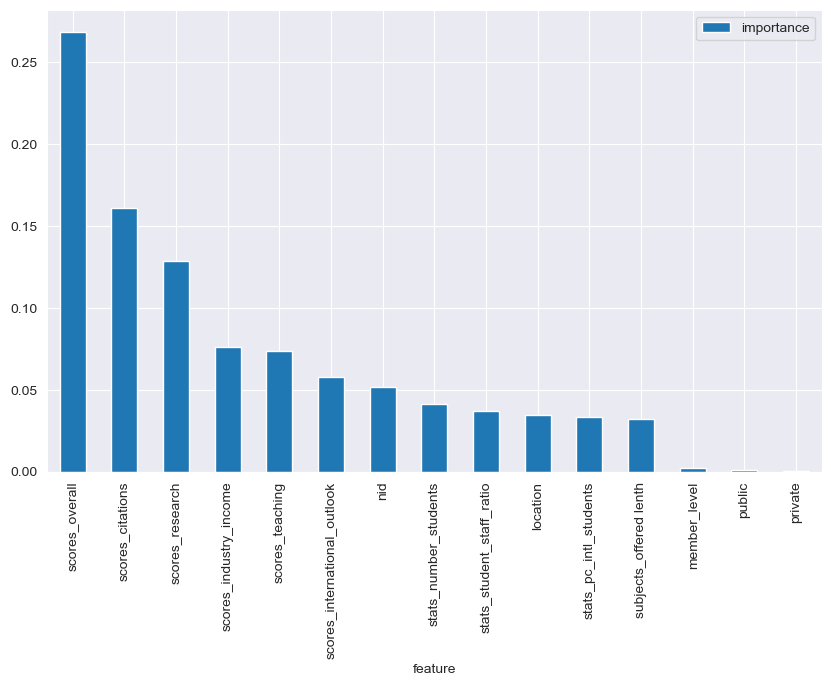

In [602]:
# Feature Importance
feature_importances = model.feature_importances_
features = X_train.columns
feature_importances_df = pd.DataFrame({'feature': features, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
feature_importances_df.sort_values('importance', ascending=False).plot(x='feature', y='importance', kind='bar', figsize=(10, 6))


In [604]:
import plotly.express as px
corr = data.corr()

fig = px.imshow(corr, color_continuous_scale='Viridis', title='Correlation Matrix', labels=dict(x='Features', y='Features', color='Correlation'), width=900, height=900, zmin=-1, zmax=1, origin='upper', template='plotly_dark', color_continuous_midpoint=0,text_auto=True)
fig.show()




In [610]:
# Random and Grid Search
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
# Fit the random search model
rf_random.fit(X_train, y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\firat\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [606]:
rf_random.best_params_


{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [611]:
from sklearn.metrics import classification_report

model = RandomForestClassifier(**rf_random.best_params_)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mt.accuracy_score(y_test, y_pred)



C:\Users\firat\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



0.7708830548926014

In [612]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       0-600       1.00      1.00      1.00       130
   1101-1300       0.27      0.36      0.31        28
   1301-1400       0.64      0.28      0.39        25
   1401-1500       0.50      0.29      0.36        14
   1501-1600       0.00      0.00      0.00        21
   1601-1700       0.00      0.00      0.00        25
       1700+       0.63      1.00      0.78        80
    601-1100       0.86      0.96      0.91        96

    accuracy                           0.77       419
   macro avg       0.49      0.49      0.47       419
weighted avg       0.70      0.77      0.72       419



C:\Users\firat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\firat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\firat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



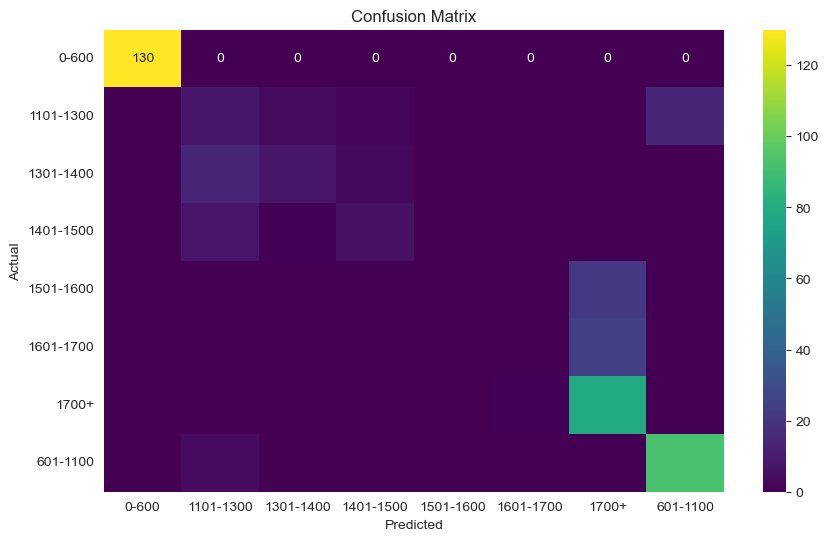

In [609]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
